In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding,Input,LSTM,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [ ]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2021-03-01 07:21:58--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2021-03-01 07:21:58 (16.7 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [ ]:
import pandas as pd
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['target']=df['v1'].map({'ham':0,'spam':1})
df

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
df.columns=['labels','data','target']
df

,labels,data,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
X=df['data'].values
Y=df['target'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
print(X_train)
print(Y_train)

['Todays Voda numbers ending 1225 are selected to receive a å£50award. If you have a match please call 08712300220 quoting claim code 3100 standard rates app '
 'What???? Hello wats talks email address?'
 'Some are lasting as much as 2 hours. You might get lucky.' ...
 'Never blame a day in ur life. Good days give u happiness. Bad days give u experience. Both are essential in life! All are Gods blessings! good morning.:'
 "You might want to pull out more just in case and just plan on not spending it if you can, I don't have much confidence in derek and taylor's money management"
 "Lol now I'm after that hot air balloon!"]
[1 0 0 ... 0 0 0]


In [ ]:
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)
print(X_train)

[[698, 1809, 747, 981, 3426, 22, 467, 2, 329, 4, 3427, 31, 3, 17, 4, 899, 102, 16, 1485, 1810, 127, 385, 3428, 1811, 1287, 1288], [54, 213, 1289, 2325, 699, 652], [130, 22, 3429, 71, 112, 71, 18, 622, 3, 330, 28, 900], [213, 71, 219, 1120, 51, 42, 43, 748, 197, 113, 100, 1812, 2, 3], [1813, 6, 96, 2326, 168, 1814, 172, 4, 286, 3430, 176, 18, 2327, 494, 3431, 1121, 176, 120, 214, 591, 168, 84, 1486, 41, 124, 816, 339], [623, 749, 4, 142, 2, 28, 319, 1288, 12, 13, 97, 1122, 37, 3, 46, 2, 5, 592, 1290, 109, 3, 98, 20, 287, 1487, 1, 85, 3, 164, 1, 982, 2, 80, 3], [653, 817, 901, 1488, 750, 1489, 88, 288, 751, 700, 44, 190, 8, 9, 14, 24, 14, 751, 198, 1123, 44, 190, 1124, 14, 593], [39, 27, 135, 4, 346, 9, 366, 556], [525, 260, 7, 902, 41, 2328, 50, 1125, 19, 367, 624, 19, 818, 206, 752, 819, 16, 701, 19, 702, 25, 1126, 3432], [1815, 1, 703, 18, 46, 87, 154, 142, 168, 1127, 1490, 136, 2329, 1, 59, 47, 903, 174, 148, 6, 1816, 67, 3433, 983, 187, 40, 8, 11, 3434, 904, 38, 820], [1, 67, 3, 3, 

In [ ]:
word2idx=tokenizer.word_index
V=len(word2idx)
print(word2idx)
print(V)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'is': 8, 'in': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, '2': 18, 'on': 19, 'that': 20, 'now': 21, 'are': 22, 'so': 23, 'but': 24, 'or': 25, 'not': 26, 'can': 27, 'get': 28, 'ur': 29, 'at': 30, 'if': 31, 'do': 32, "i'm": 33, 'be': 34, 'just': 35, 'with': 36, 'will': 37, 'no': 38, 'we': 39, 'this': 40, '4': 41, 'lt': 42, 'gt': 43, 'when': 44, 'ok': 45, 'go': 46, 'up': 47, 'how': 48, 'all': 49, 'free': 50, 'from': 51, 'out': 52, 'know': 53, 'what': 54, 'then': 55, 'like': 56, 'good': 57, 'was': 58, 'got': 59, 'its': 60, 'am': 61, 'time': 62, 'come': 63, 'only': 64, 'send': 65, 'day': 66, 'love': 67, 'there': 68, 'want': 69, 'he': 70, 'as': 71, 'txt': 72, "i'll": 73, 'text': 74, 'going': 75, 'one': 76, 'about': 77, 'by': 78, 'stop': 79, 'see': 80, 'home': 81, 'sorry': 82, 'lor': 83, 'still': 84, 'need': 85, 'mobile': 86, 'n': 87, 'our': 88, 'today': 89, 'she': 90, 'r': 91, 'repl

In [ ]:
X_train=pad_sequences(X_train)
T=X_train.shape[1]

In [ ]:
X_test=pad_sequences(X_test,maxlen=T)

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling1D
D=20
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(50,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
117/117 [==============================] - 12s 90ms/step - loss: 0.5024 - accuracy: 0.8583 - val_loss: 0.4103 - val_accuracy: 0.8559
Epoch 2/10
117/117 [==============================] - 10s 88ms/step - loss: 0.3728 - accuracy: 0.8731 - val_loss: 0.3667 - val_accuracy: 0.8559
Epoch 3/10
117/117 [==============================] - 10s 88ms/step - loss: 0.2805 - accuracy: 0.8837 - val_loss: 0.1476 - val_accuracy: 0.9690
Epoch 4/10
117/117 [==============================] - 10s 88ms/step - loss: 0.0937 - accuracy: 0.9868 - val_loss: 0.0811 - val_accuracy: 0.9777
Epoch 5/10
117/117 [==============================] - 10s 88ms/step - loss: 0.0423 - accuracy: 0.9881 - val_loss: 0.0639 - val_accuracy: 0.9821
Epoch 6/10
117/117 [==============================] - 11s 90ms/step - loss: 0.0227 - accuracy: 0.9952 - val_loss: 0.0596 - val_accuracy: 0.9826
Epoch 7/10
117/117 [==============================] - 10s 89ms/step - loss: 0.0174 - accuracy: 0.9963 - val_loss: 0.0596 - val_accuracy:

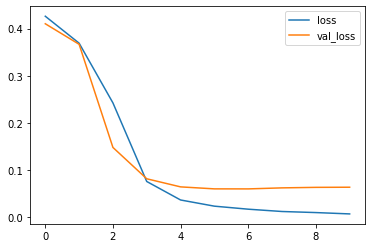

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
import numpy as np
predicted=model.predict(X_test)
p=np.round(predicted).flatten()
print(p)
print('ACCURACY:',np.mean(p==Y_test))

[0. 0. 0. ... 0. 0. 0.]
ACCURACY: 0.9842305600870038


# For instance, 
if you want to detect the presence of something in your sequences, max pooling seems a good option.

But if the contribution of the entire sequence seems important to your result, then average pooling sounds reasonable.